In [43]:
import pandas as pd
import numpy as np
import datetime
import pytz
from importlib import reload
import darwin
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
reload(darwin)
folder = "/home/ben/data/darwin_measured/"
garpath = Path('/home/ben/data/GAR/')

In [3]:
stations = {
    "Santa Rosa": "09_AWS-PSantaRosa_data.csv",
    "Cerro Crocker": "11_AWS-PCerroCrocker_data.csv",
    "Sierra Negra": "14_AWS-PSierraNegra_data.csv",
    "Cueva de Sucre": "16_AWS-PCuevadeSucre_data.csv",
    "La Galapaguera": "18_AWS-PLaGalapaguera_data.csv",
    "El Junco": "20_AWS-PElJunco_data.csv",
    "Puerto Baquerizo Moreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    "Puerto Villamil": "24_AWS-PPuertoVillamil_data.csv",
    "Puerto Ayora": "26_AWS-PPuertoAyora_data.csv",
    "Military": "28_AWS-PMilitar_data.csv",
    "Minas Rojas": "30_AWS-PMinasRojas_data.csv",
}
for key, value in stations.items():
    df = darwin.open_measurements(folder + value)

In [4]:
datasets = {}
var = 'prcp'
paths = {
    'tropical': f'rc_trop_ls_tutorial_stations_d_2d_{var}_2022.csv',
    'Kain-Fritsch (KF)': f'rc_trop_ls_KF_stations_d_2d_{var}_2022.csv',
    'KF with kfeta-trigger': f'rc_trop_ls_KF_kfeta-trigger_stations_d_2d_{var}_2022.csv',
    'KF Cumulus Potential': f'rc_trop_ls_KFCuP_stations_d_2d_{var}_2022.csv',
    'Grell 3D': f'rc_trop_ls_G3D_stations_d_2d_{var}_2022.csv',
    'Thompson': f'rc_trop_ls_TG_stations_d_2d_{var}_2022.csv',
    'MYNN': f'rc_trop_ls_MYNN_stations_d_2d_{var}_2022.csv',
    'MYNN-TG': f'rc_trop_ls_MYNN-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG': f'rc_trop_ls_KF-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG-MM5': f'rc_trop_ls_KF-TG-bpl_stations_d_2d_{var}_2022.csv',
    # 'tropical (early)': f'rc_trop_ls_vert43/rc_trop_ls_vert43_d02km_d_2d_{var}_2022.csv',
}

In [5]:
for key, value in paths.items():
    datasets[key] = pd.read_csv(f"/home/ben/projects/darwin/{value}")
    datasets[key].index = pd.DatetimeIndex(datasets[key]["datetime"], tz=datetime.timezone.utc)
    datasets[key].drop("datetime", axis=1, inplace=True)
    datasets[key] = datasets[key].loc["2022-04-01":"2022-04-30"] * 24

In [6]:
pd.DataFrame(pd.read_csv("/home/ben/data/darwin_measured/09_AWS-PSantaRosa_data.csv"))

,datetime,Pabs,T,RH,SLR,WS,WSmax,WD,PCP_diff_radar,PCP_acoustic,FOG
0,2022-03-24 12:10:00,964.0,24.30,92.3,310.6,2.20,5.0,120.4,0.02,NaN,0.0
1,2022-03-24 12:20:00,964.0,23.91,96.1,318.7,1.64,5.0,101.0,0.07,NaN,-1.2
2,2022-03-24 12:30:00,964.0,23.95,96.9,345.5,1.85,4.7,109.3,0.02,NaN,-3.9
3,2022-03-24 12:40:00,963.0,23.71,97.8,426.7,1.45,3.9,109.5,0.01,NaN,-3.3
4,2022-03-24 12:50:00,963.0,24.22,98.5,596.2,1.32,3.2,107.6,0.00,NaN,-2.3
...,...,...,...,...,...,...,...,...,...,...,...
28211,2022-10-06 10:00:00,967.0,17.05,100.0,302.4,1.51,3.7,135.8,0.00,0.0,-5.4
28212,2022-10-06 10:10:00,967.0,17.12,100.0,266.2,1.33,3.6,166.0,0.00,0.0,4.5
28213,2022-10-06 10:20:00,967.0,17.42,100.0,294.8,1.04,3.3,144.2,0.00,0.0,-1.9
28214,2022-10-06 10:30:00,967.0,17.68,100.0,343.4,0.97,3.3,159.8,0.00,0.0,-2.7


In [85]:
reload(darwin)
start = "2022-04-01"
end = "2022-04-30"

metrics = pd.DataFrame(
    index = ["tropical",
    "Kain-Fritsch (KF)",
    "KF with kfeta-trigger",
    "KF Cumulus Potential",
    "Grell 3D",
    "Thompson",
    "MYNN",
    "MYNN-TG",
    "KF-TG",
    "KF-TG-MM5",
    ],
    columns = [
        "Correlation",
        "RMSE",
        "Mean Bias"
    ],
)
stations = {
    "rosa": "09_AWS-PSantaRosa_data.csv",
    "crocker": "11_AWS-PCerroCrocker_data.csv",
    "negra": "14_AWS-PSierraNegra_data.csv",
    "cuevadesucre": "16_AWS-PCuevadeSucre_data.csv",
    "lagalapaguera": "18_AWS-PLaGalapaguera_data.csv",
    # "eljunco": "20_AWS-PElJunco_data.csv",
    "puertobaccerizomoreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    # "puertovillamil": "24_AWS-PPuertoVillamil_data.csv",
    "puertoayora": "26_AWS-PPuertoAyora_data.csv",
    "militar": "28_AWS-PMilitar_data.csv",
    "minasrojas": "30_AWS-PMinasRojas_data.csv",
}

In [90]:
metrics

,Correlation,RMSE,Mean Bias
tropical,0.38,3.8,2.33
Kain-Fritsch (KF),0.24,3.0,0.78
KF with kfeta-trigger,0.24,5.0,1.63
KF Cumulus Potential,0.3,6.9,2.24
Grell 3D,0.11,7.9,2.08
Thompson,0.38,3.8,0.95
MYNN,0.27,11.4,3.8
MYNN-TG,0.27,7.3,1.83
KF-TG,0.23,2.0,-0.22
KF-TG-MM5,0.18,2.0,-0.27


In [87]:
reload(darwin)
from statistics import mean
for index, key_wrf in enumerate(datasets):
    correlations = []
    rmses = []
    mbes = []
    for key, value in stations.items():
        mf = darwin.open_measurements(folder + value)
        mf = mf.loc[start: end].resample("D").sum()
        if key != 'militar':
            correlations.append(datasets[key_wrf][key].corr(mf["PCP_diff_radar"]))
            rmses.append(((datasets[key_wrf][key] - mf["PCP_diff_radar"]) ** 2).mean() ** .5)
            mbes.append((datasets[key_wrf][key] - mf["PCP_diff_radar"]).mean())
    metrics.at[key_wrf, "Correlation"] = np.around(np.mean(np.asarray(correlations)), decimals=2)
    metrics.at[key_wrf, "RMSE"] = np.around(np.mean(np.asarray(rmses)), decimals=1)
    metrics.at[key_wrf, "Mean Bias"] = np.around(np.mean(np.asarray(mbes)), decimals=2)

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 38
Kain-Fritsch (KF) 15
KF with kfeta-trigger 51
KF Cumulus Potential 67
Grell 3D 19
Thompson 69
MYNN 69
MYNN-TG 61
KF-TG 36
KF-TG-MM5 38


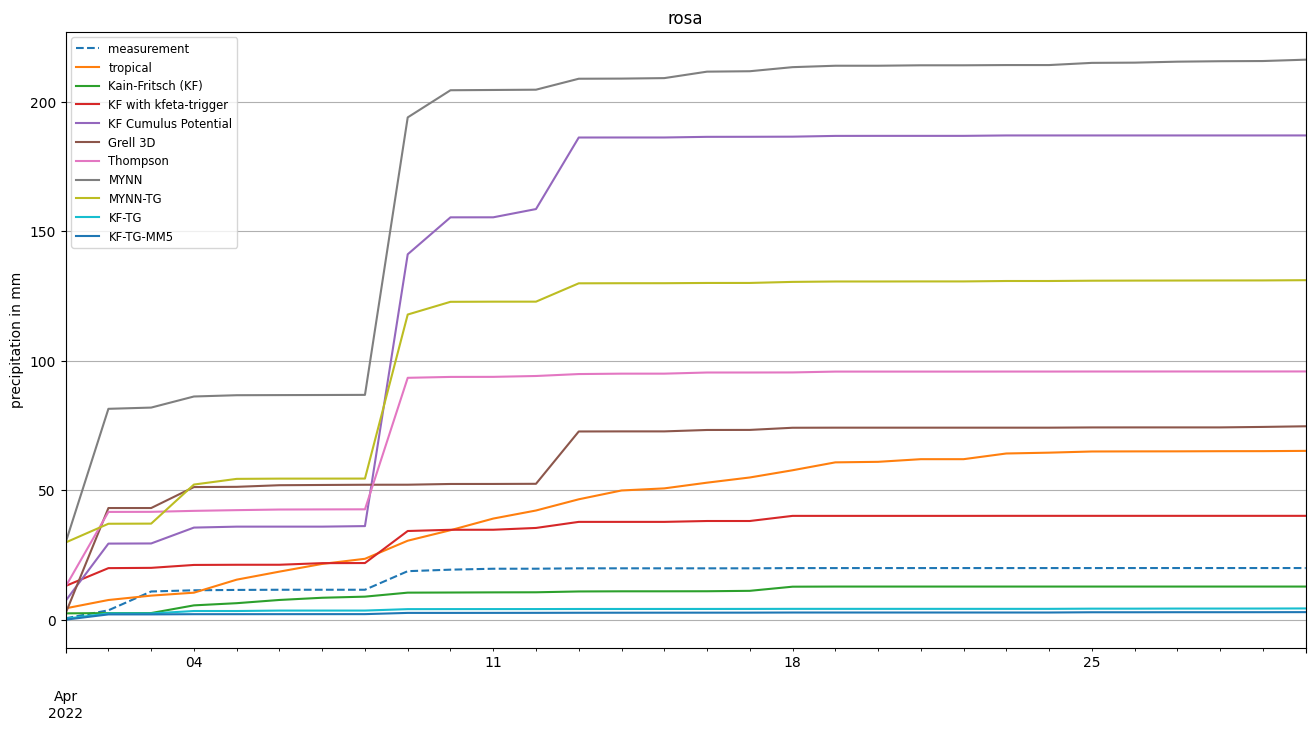

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 33
Kain-Fritsch (KF) 24
KF with kfeta-trigger -3
KF Cumulus Potential 1
Grell 3D -2
Thompson -6
MYNN -8
MYNN-TG -12
KF-TG 10
KF-TG-MM5 18


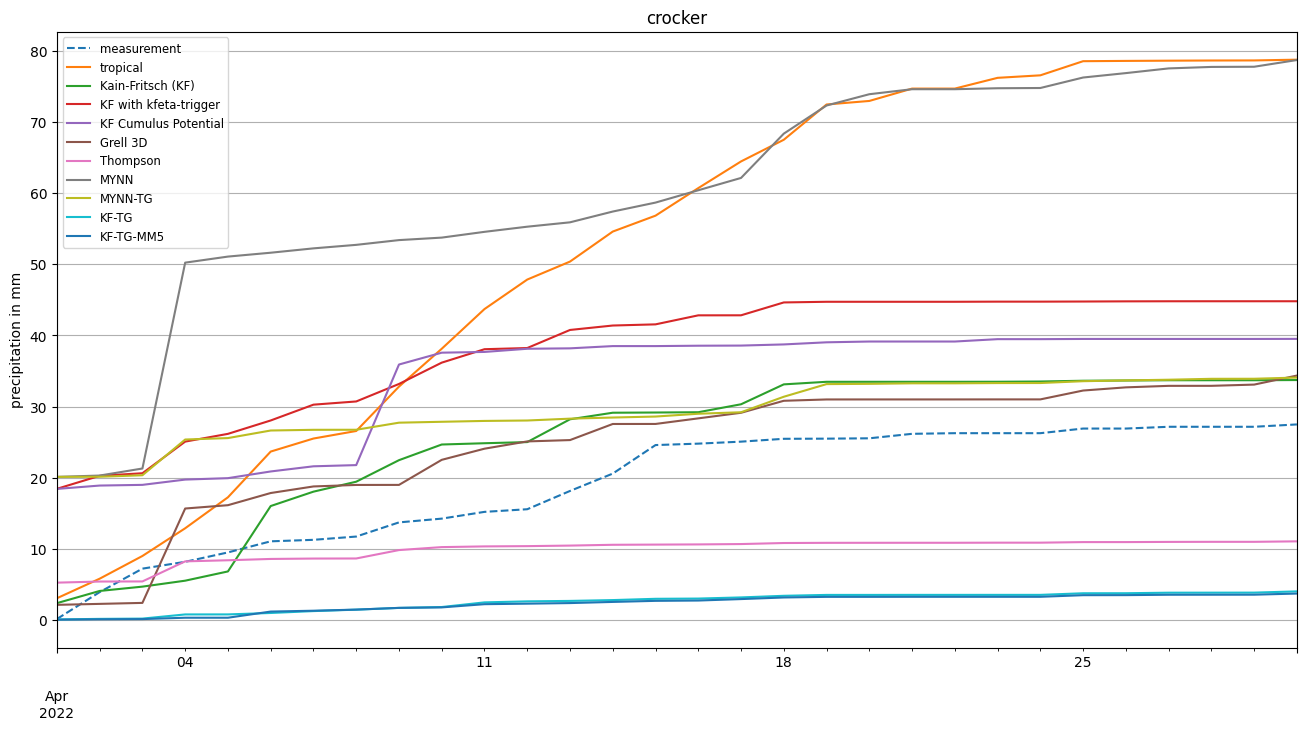

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 52
Kain-Fritsch (KF) 9
KF with kfeta-trigger 16
KF Cumulus Potential 9
Grell 3D 15
Thompson 30
MYNN 35
MYNN-TG 9
KF-TG -17
KF-TG-MM5 -14


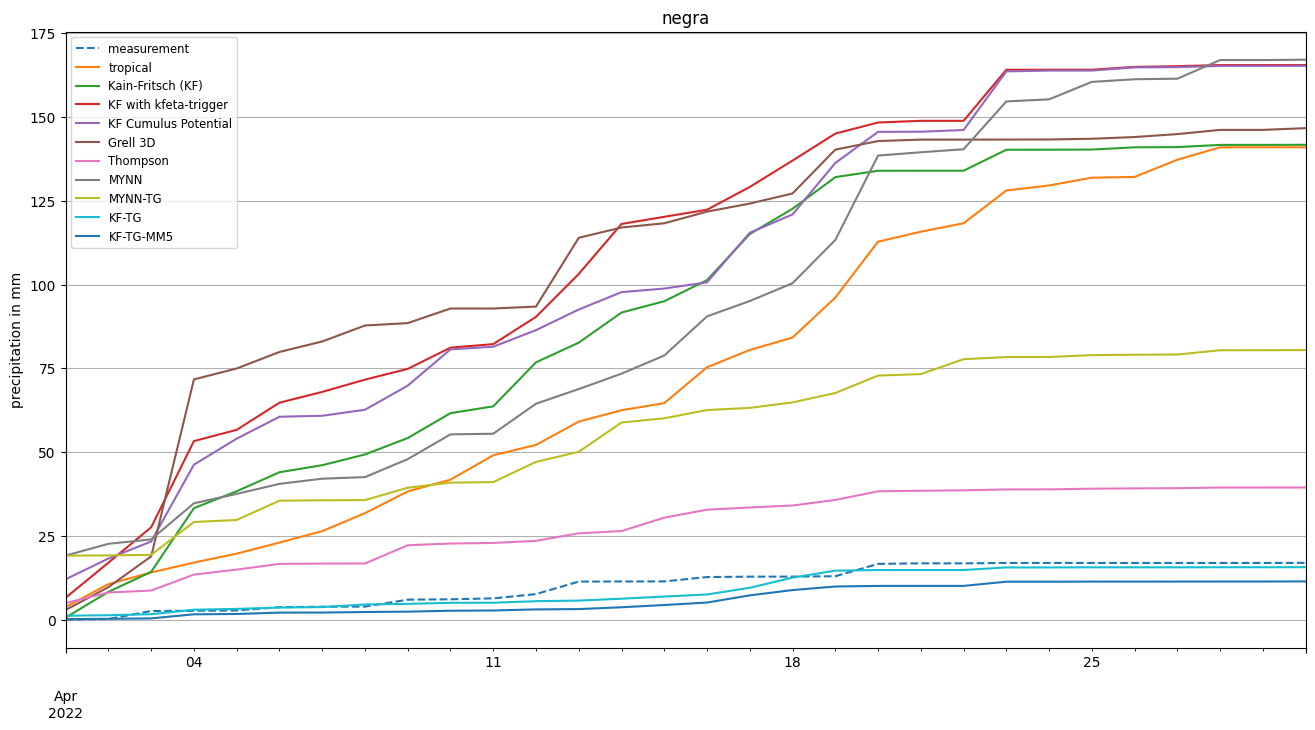

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 25
Kain-Fritsch (KF) 0
KF with kfeta-trigger 29
KF Cumulus Potential 29
Grell 3D -4
Thompson 6
MYNN 19
MYNN-TG 9
KF-TG 6
KF-TG-MM5 4


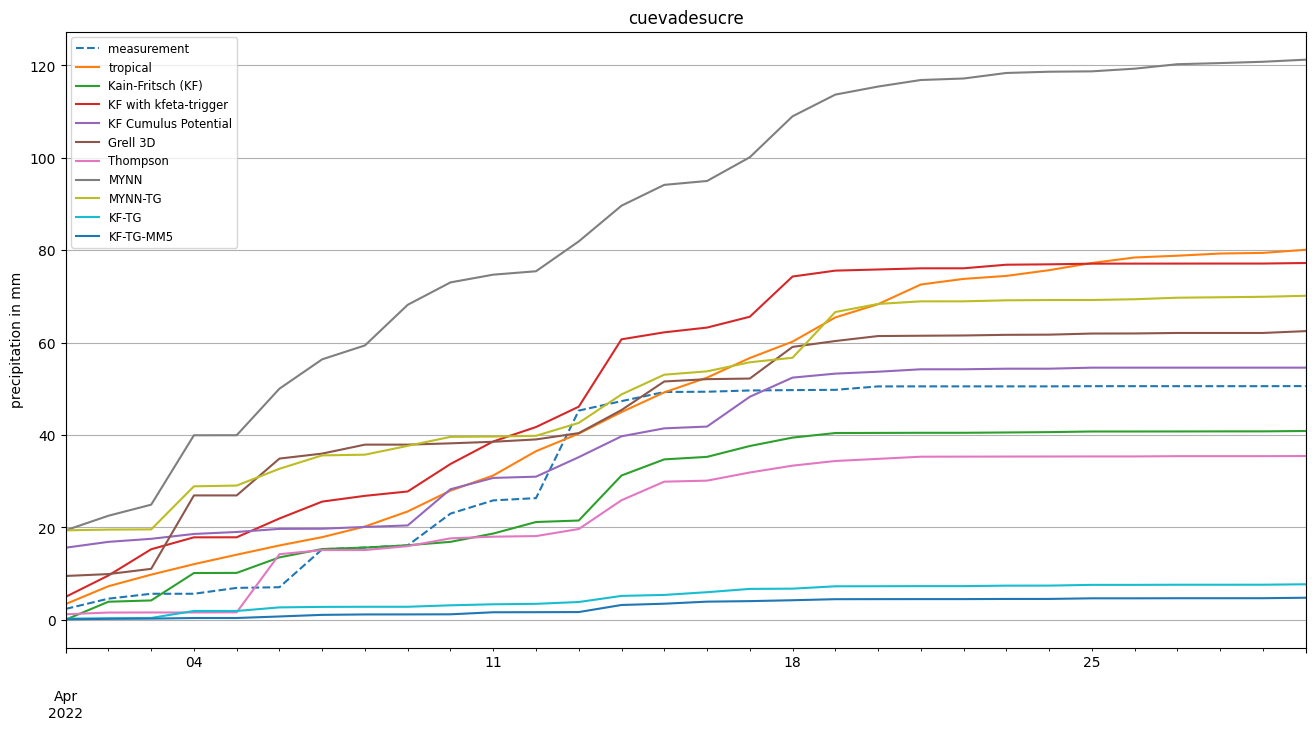

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 13
Kain-Fritsch (KF) 4
KF with kfeta-trigger 33
KF Cumulus Potential 9
Grell 3D 16
Thompson 84
MYNN 19
MYNN-TG 20
KF-TG 20
KF-TG-MM5 19


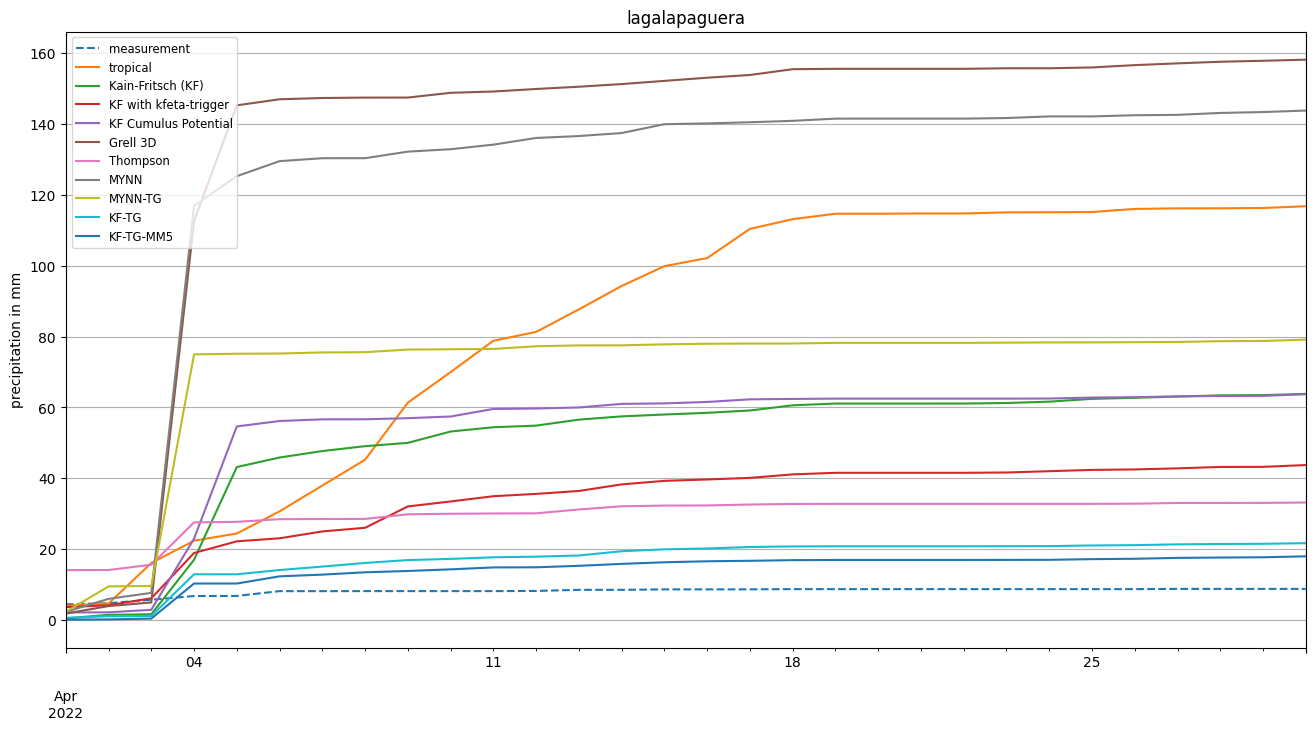

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 50
Kain-Fritsch (KF) 4
KF with kfeta-trigger 37
KF Cumulus Potential 27
Grell 3D 30
Thompson 74
MYNN 51
MYNN-TG 79
KF-TG 54
KF-TG-MM5 22


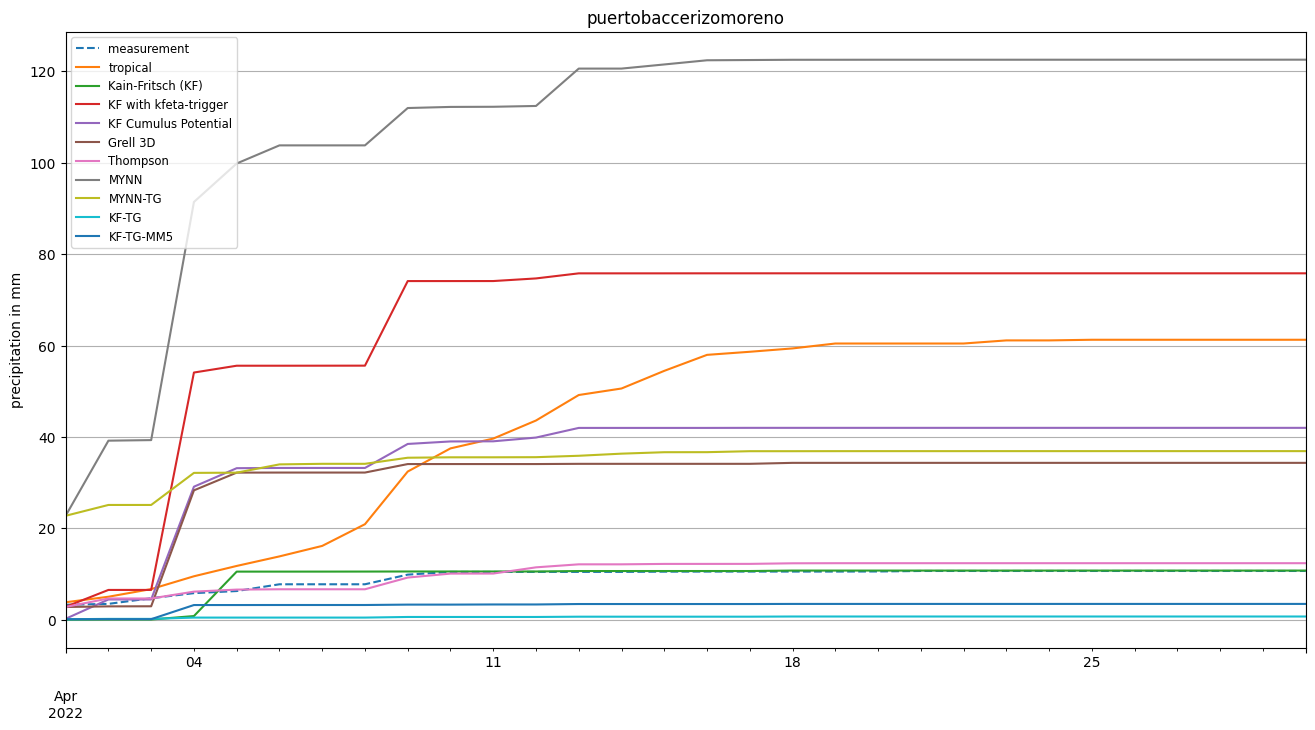

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 23
Kain-Fritsch (KF) 83
KF with kfeta-trigger -7
KF Cumulus Potential 44
Grell 3D -6
Thompson -11
MYNN -6
MYNN-TG -5
KF-TG 75
KF-TG-MM5 40


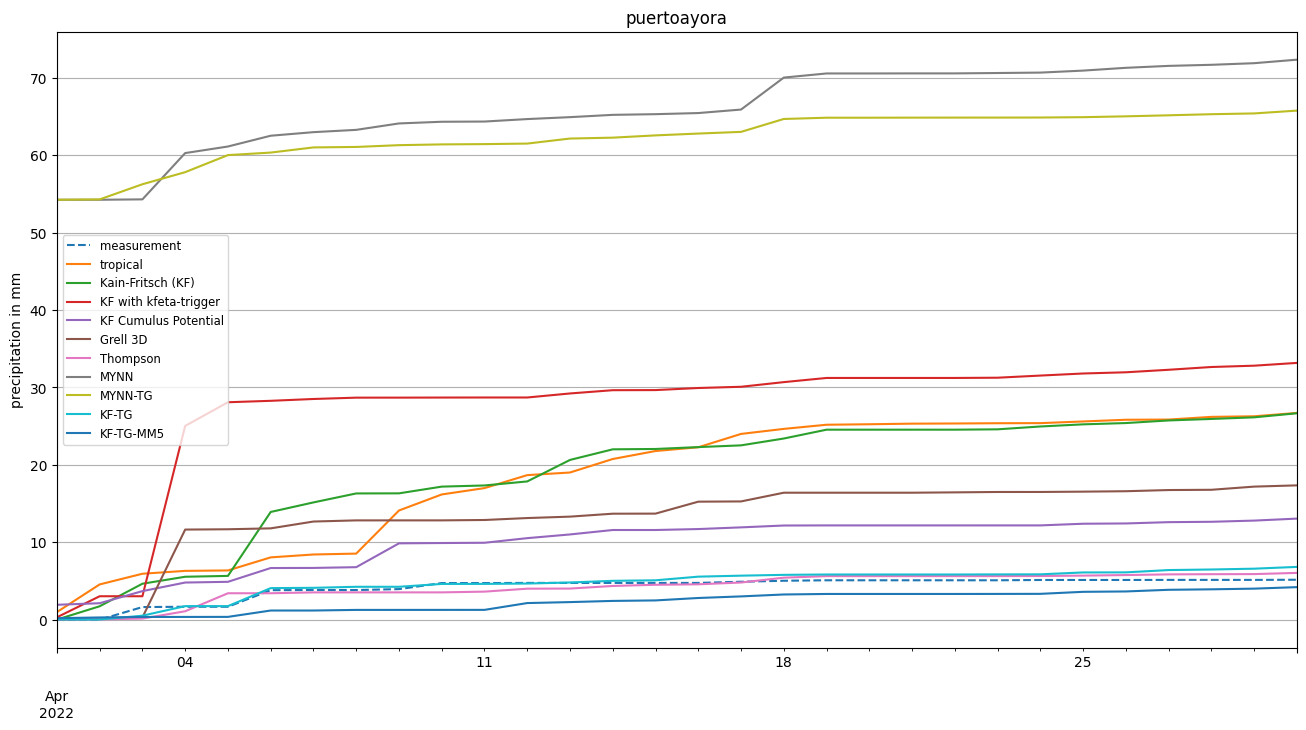

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


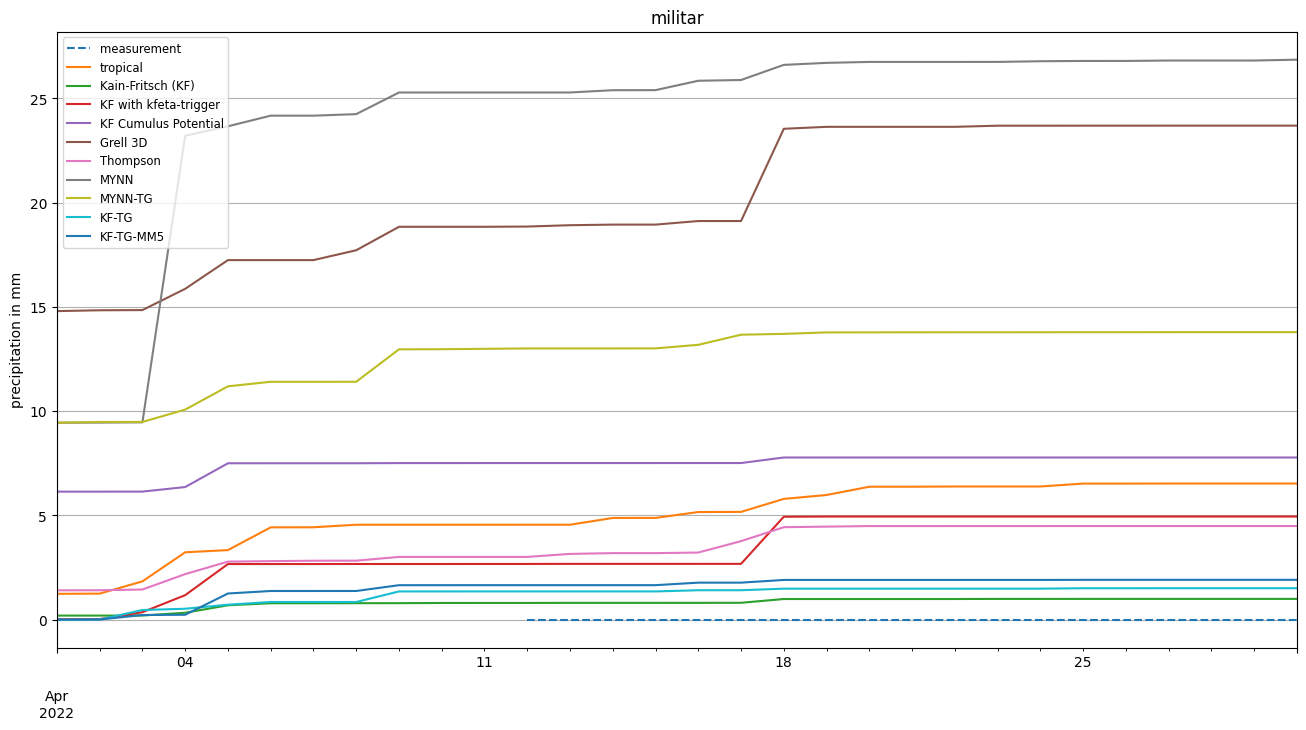

/tmp/ipykernel_433770/3660567539.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mf = mf.loc[start: end].resample("D").sum()


tropical 66
Kain-Fritsch (KF) 52
KF with kfeta-trigger 34
KF Cumulus Potential 53
Grell 3D 20
Thompson 54
MYNN 38
MYNN-TG 53
KF-TG 3
KF-TG-MM5 15


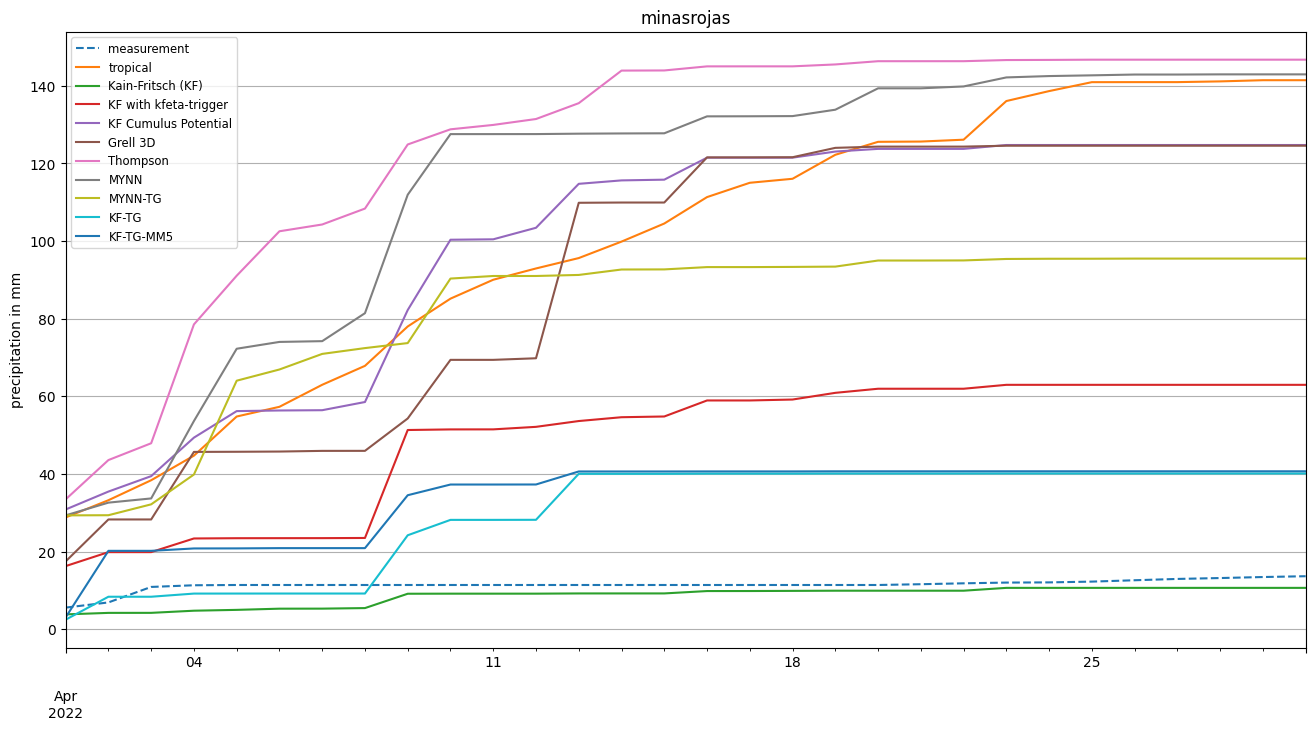

In [29]:
reload(darwin)

for key, value in stations.items():
    mf = darwin.open_measurements(folder + value)
    fig, ax = plt.subplots(figsize=(16,8), sharex=True, sharey=True, )
    mf = mf.loc[start: end].resample("D").sum()
    mf["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement", style="--")
    for index, key_wrf in enumerate(datasets):
        datasets[key_wrf][key].cumsum().plot(ax=ax, label=key_wrf)
    ax.set_title(key)
    ax.set_xlabel("")
    ax.set_ylabel("precipitation in mm")
    plt.legend(fontsize='small')
    plt.grid()
    # plt.savefig(f"comparison_{var}_{key}_station.png")
    plt.show()

In [ ]:
# Correlations
reload(darwin)

stations = {
    "rosa": "09_AWS-PSantaRosa_data.csv",
    "crocker": "11_AWS-PCerroCrocker_data.csv",
    "negra": "14_AWS-PSierraNegra_data.csv",
    "cuevadesucre": "16_AWS-PCuevadeSucre_data.csv",
    "lagalapaguera": "18_AWS-PLaGalapaguera_data.csv",
    # "eljunco": "20_AWS-PElJunco_data.csv",
    "puertobaccerizomoreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    # "puertovillamil": "24_AWS-PPuertoVillamil_data.csv",
    "puertoayora": "26_AWS-PPuertoAyora_data.csv",
    "militar": "28_AWS-PMilitar_data.csv",
    "minasrojas": "30_AWS-PMinasRojas_data.csv",
}
for index, key_wrf in enumerate(datasets):
    if key != 'militar':
        for key, value in stations.items():
            stations[key] = open_measurements(folder + value)
            stations[key]["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement", style="--")
            correlations = []
            correlation = round(datasets[key_wrf][key].corr(stations[key]["PCP_diff_radar"])*100,)
            print(key_wrf, str(correlation))

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
plt.scatter(df["PCP_diff_radar"], wrf_prcp["crocker"].loc[:"2022-09-15"])
plt.xlabel("measurements in mm")
plt.ylabel("WRF in mm")
plt.grid()

In [ ]:
df = open_measurements(folder + "26_AWS-PPuertoAyora_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["puertoayora"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = open_measurements(folder + "09_AWS-PSantaRosa_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["rosa"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = open_measurements(folder + "30_AWS-PMinasRojas_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["minasrojas"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = open_measurements(folder + "20_AWS-PElJunco_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["eljunco"].loc["2022-05-20":"2022-08-18"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = open_measurements(folder + "22_AWS-PPuertoBaquerizoMoreno_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["puertobaccerizomoreno"].loc[:"2022-08-19"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = open_measurements(folder + "18_AWS-PLaGalapaguera_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["lagalapaguera"].loc[:"2022-08-19"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
df = open_measurements(folder + "14_AWS-PSierraNegra_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["negra"].loc[:"2022-09-02"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df["PCP_diff_radar"],wrf_prcp["cuevadesucre"].loc[:"2022-09-01"])
plt.grid()

In [ ]:
df = open_measurements(folder + "16_AWS-PCuevadeSucre_data.csv")
fig, ax = plt.subplots(figsize=(12,8))
df["PCP_diff_radar"].cumsum().plot(ax=ax, label="measurement")
# df["PCP_tot_bucket"].cumsum().plot(ax=ax)
wrf_prcp["cuevadesucre"].loc[:"2022-09-02"].cumsum().plot(ax=ax, label="WRF")
plt.legend()
plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(df["PCP_diff_radar"].sort_values(),wrf_prcp["cuevadesucre"].loc[:"2022-09-01"].sort_values())
plt.grid()